In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')


# Path to CSV files
nodes = pd.read_csv('/content/drive/My Drive/Files/nodes.csv')
edges = pd.read_csv('/content/drive/My Drive/Files/edges.csv')


# display the DataFrame columns
print(f"Nodes columns:\n{nodes.columns}\n")
print(f"Edges columns:\n{edges.columns}")

Mounted at /content/drive
Nodes columns:
Index(['Id', 'Label', 'Gender', 'movie_id', 'componentnumber',
       'modularity_class'],
      dtype='object')

Edges columns:
Index(['Source', 'Target', 'Type', 'Id', 'Label', 'Weight', 'movie_id'], dtype='object')


In [3]:
# lowercases for all edges columns
edges.columns = edges.columns.str.lower()

In [4]:
# lowercases for all nodes columns
nodes.columns = nodes.columns.str.lower()

In [5]:
# basic info on nodes
nodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                70 non-null     int64 
 1   label             70 non-null     object
 2   gender            70 non-null     object
 3   movie_id          70 non-null     int64 
 4   componentnumber   70 non-null     int64 
 5   modularity_class  70 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 3.4+ KB


In [6]:
# basic info on edges
edges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   source    299 non-null    int64 
 1   target    299 non-null    int64 
 2   type      299 non-null    object
 3   id        299 non-null    int64 
 4   label     299 non-null    int64 
 5   weight    299 non-null    int64 
 6   movie_id  299 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 16.5+ KB


## Part 1

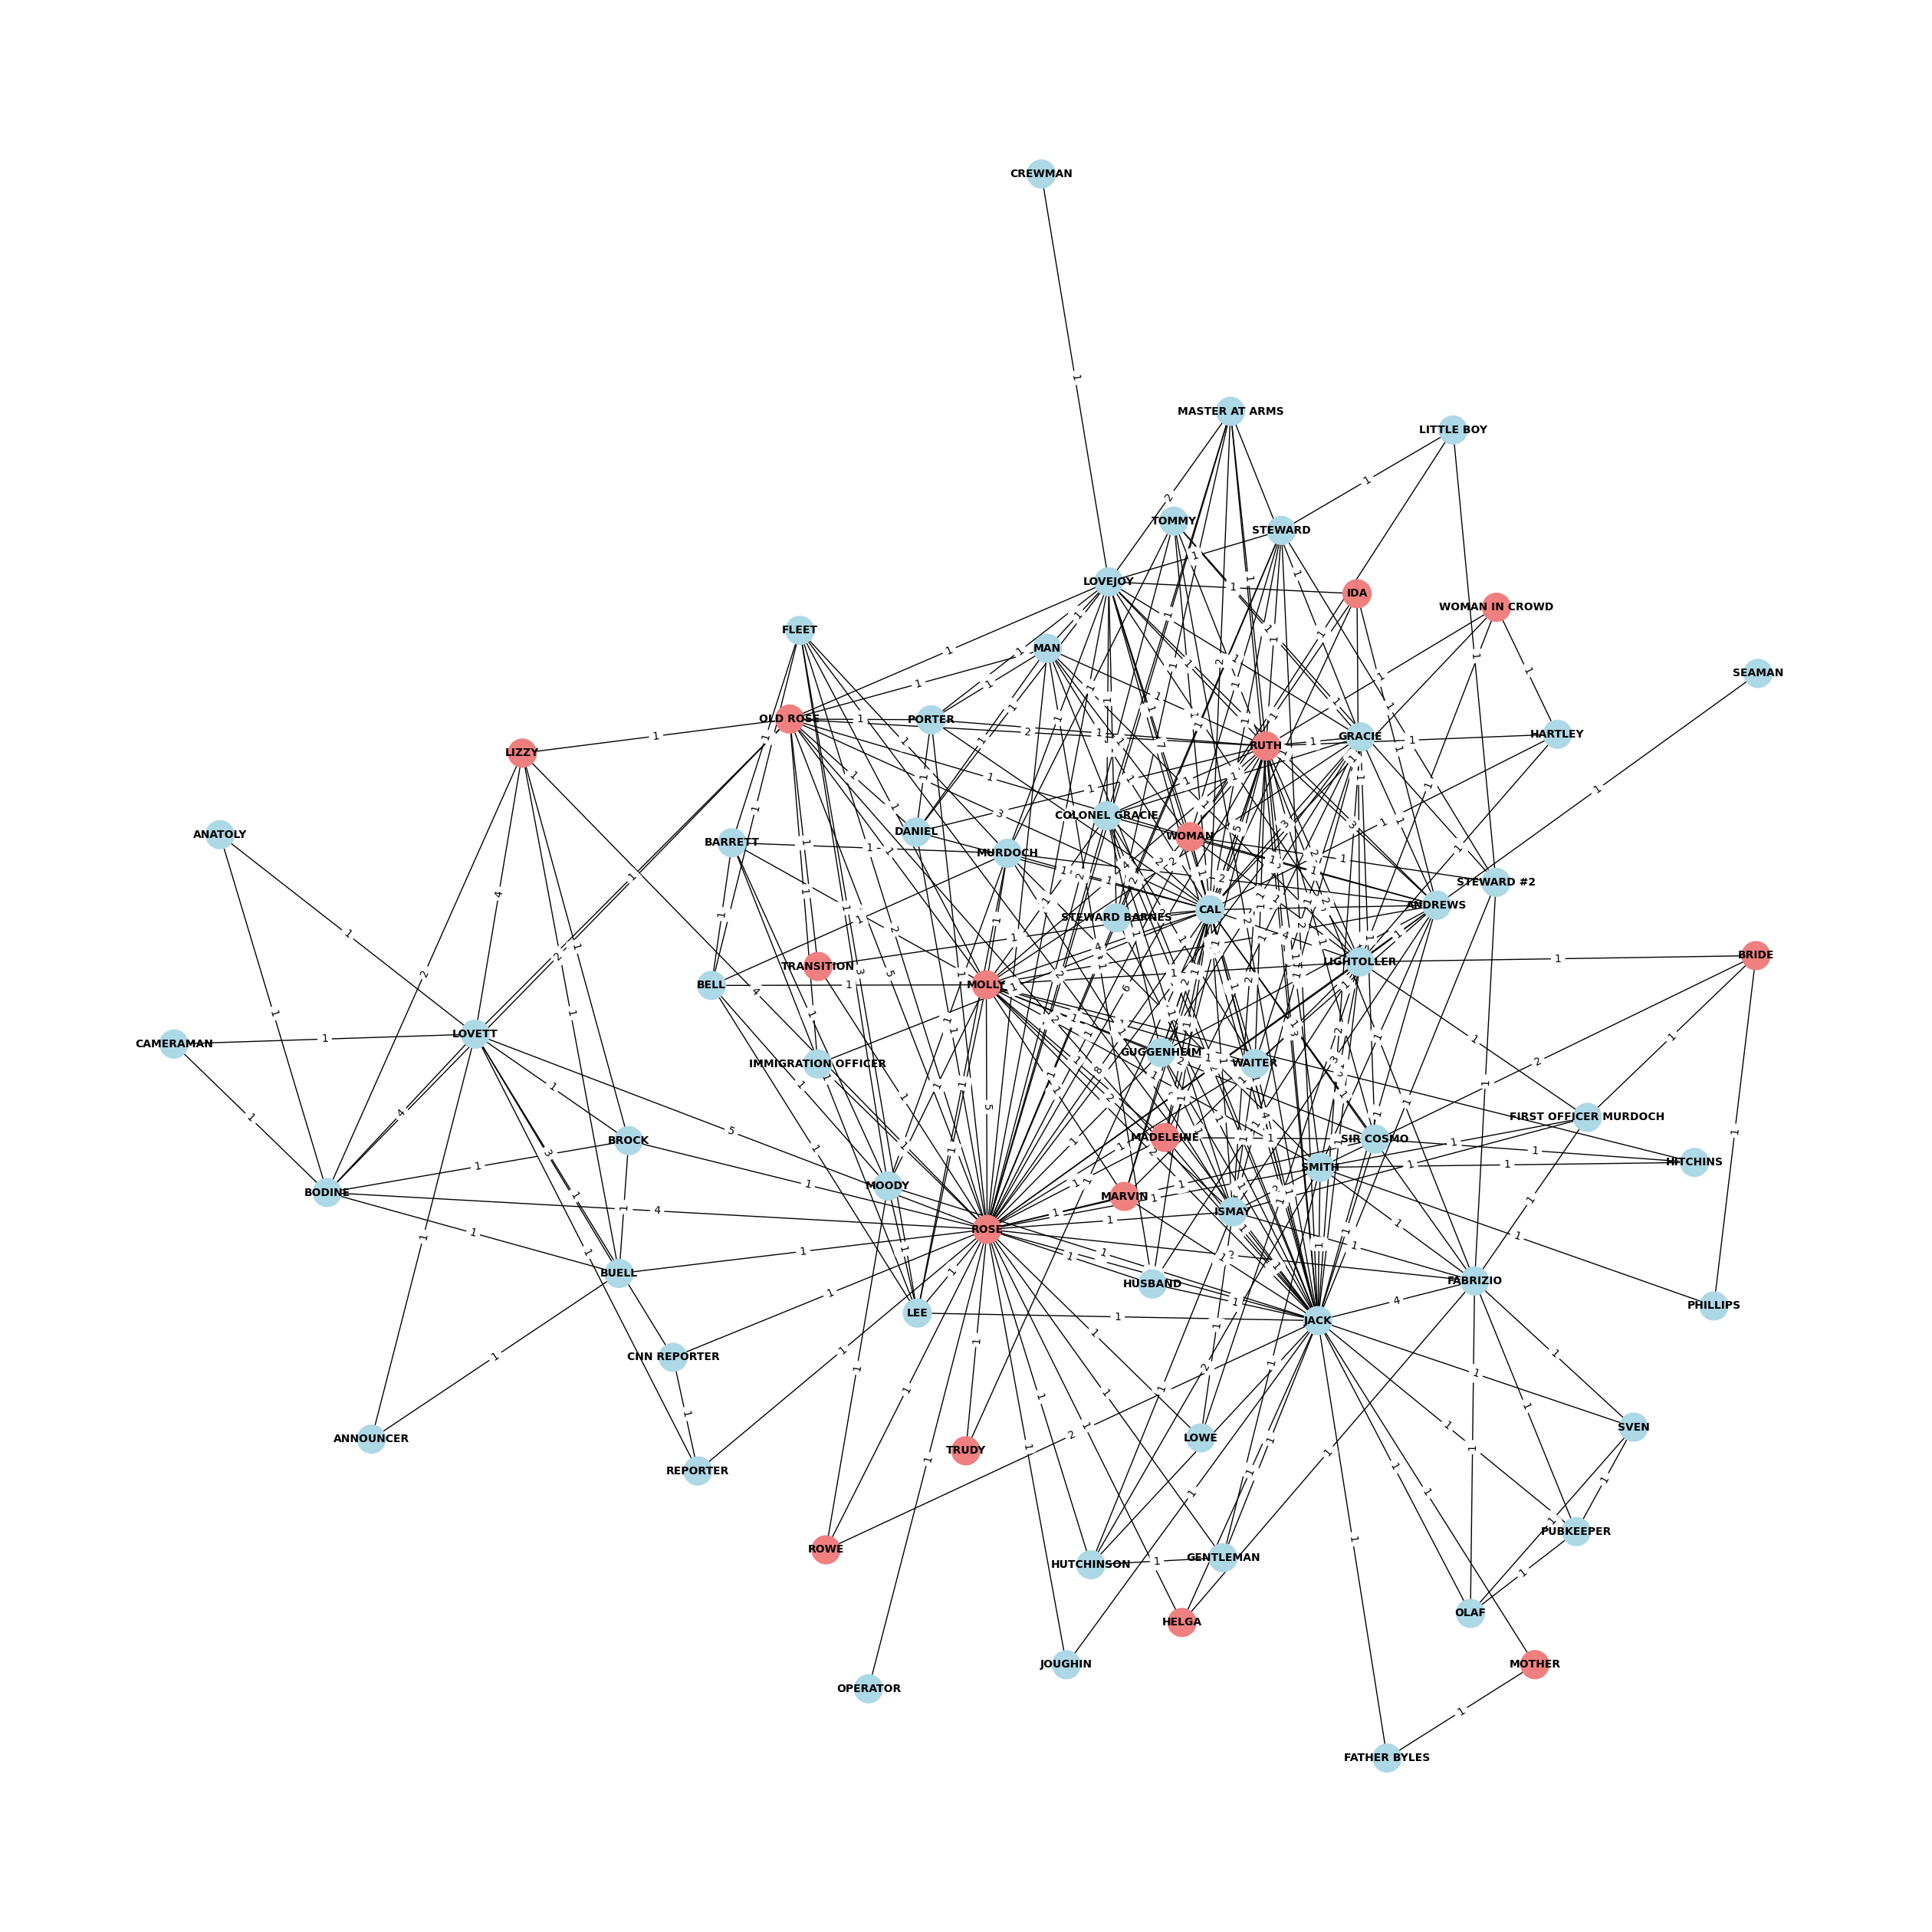

In [7]:
# creates an undirected graph
G = nx.Graph()

# Add nodes to the graph
for index, row in nodes.iterrows(): # Loops through each row of the nodes DataFrame
    G.add_node(row['id'], label=row['label'], gender=row['gender']) # Adds a node to the graph for each row

# Add edges to the graph
for index, row in edges.iterrows():
    G.add_edge(row['source'], row['target'], weight=row['weight']) # Adds an edge between two nodes in the graph

# set the layout for visualization
pos = nx.kamada_kawai_layout(G)

# Get node labels and gender for coloring
labels = nx.get_node_attributes(G, 'label')
gender = nx.get_node_attributes(G, 'gender')

# Color nodes based on gender
node_color = ['lightblue' if gender[node] == 'M' else 'lightcoral' for node in G.nodes()]

#  graph with character names
plt.figure(figsize=(25, 25))
nx.draw(G, pos, with_labels=True, labels=labels, node_color=node_color, node_size=700, font_size=10, font_weight='bold')

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Show the plot
plt.show()

The goal was to connect the edges and nodes to create a graph that displays their relationships. The nodes are colored to indicate the gender of the characters, and they show character names, making interpretation easier than using IDs.

The edges have numerical values representing the importance of the relationships, with higher numbers indicating stronger connections. NetworkX was used to create the graph.

In summary, the nodes represent characters, while the edges represent the relationships between them. More edges = More relationships

## Part 2

### Graph Analysis
Determinate the basic graph indicators:
**Total number of nodes and edges**: to understand the *scale and complexity* of the graph
**Average degree**: giving an average of *connections per node*
**Graph density**:  providing an insight into the *overall connectivity*

In [8]:
# number of total edges and nodes
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print(f"Total number of nodes: {num_nodes}")
print(f"Total number of edges: {num_edges}")

Total number of nodes: 70
Total number of edges: 299


In [9]:
# the degree for each node
degrees = dict(G.degree())
# calculate the average
average_degree = sum(degrees.values()) / num_nodes

print(f"Average degree: {average_degree}")

Average degree: 8.542857142857143


In [10]:
# how densely connected the graph is
graph_density = nx.density(G)

print(f"Graph density: {graph_density}")

Graph density: 0.12380952380952381


In this section, I calculated the number of edges and nodes in the graph using NetworkX. This approach helps to quantify the size of the graph by showing the number of unique characters and the relationships among them.

I chose to analyze the degree of each node to understand how connected the characters are within the network. The results indicated an average degree of 8.54, meaning that, on average, each character is connected to about 8 others. This insight reveals a moderately connected network, indicating a fair number of relationships.

Additionally, I calculated graph density to measure the proportion of existing edges compared to the maximum possible edges. The resulting density of 0.12 (or 12% connectivity), which indicates that only 12% of the possible relationships among characters are present, meaning many characters do not know each other.

## Part 3

### Node analysis
Calculate basic centralities and compare the most central characters.

In [11]:
# Degree Centrality
degree_centrality = nx.degree_centrality(G)

# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)

# Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G)

# Combine all centralities into a DataFrame for comparison

centralities_df = pd.DataFrame({
    'Character': [G.nodes[node]['label'] for node in G.nodes()],
    'Degree Centrality': [degree_centrality[node] for node in G.nodes()],
    'Betweenness Centrality': [betweenness_centrality[node] for node in G.nodes()],
    'Closeness Centrality': [closeness_centrality[node] for node in G.nodes()],
    'Eigenvector Centrality': [eigenvector_centrality[node] for node in G.nodes()]
})

# Sort the characters by their degree centrality
sorted_centralities = centralities_df.sort_values(by='Degree Centrality', ascending=False)

# Display the top characters by degree centrality
sorted_centralities.head(10)

,Character,Degree Centrality,Betweenness Centrality,Closeness Centrality,Eigenvector Centrality
0,ROSE,0.666667,0.382931,0.750000,0.340877
1,JACK,0.565217,0.218468,0.676471,0.315453
2,CAL,0.478261,0.089469,0.633028,0.303755
9,RUTH,0.362319,0.037141,0.594828,0.266940
3,MOLLY,0.333333,0.057112,0.575000,0.232620
7,LOVEJOY,0.275362,0.043238,0.556452,0.206246
5,LIGHTOLLER,0.260870,0.048164,0.560976,0.180988
8,ANDREWS,0.246377,0.038160,0.556452,0.207984
14,ISMAY,0.231884,0.016251,0.543307,0.186896
10,OLD ROSE,0.217391,0.033653,0.543307,0.155452


Degree Centrality counts the number of connections a character has, with a higher number indicating greater popularity. In the Titanic dataset, Rose and Jack had the most connections.

Betweenness Centrality shows how important a character is in connecting different groups, acting as a bridge between them. Based on the data, Rose has the most connections across several groups, followed by Jack.

Closeness Centrality measures how quickly a node can reach all other nodes in the network, reflecting its efficiency in connecting with others. In the Titanic dataset, Rose and Jack scored the highest, indicating their ability to connect with many people through their existing relationships.

Eigenvector Centrality measures connections while accounting for the importance of those connections. It gives more weight to characters who are well-connected to other influential characters. In this case, Rose, Jack, and Cal had the most influential connections.


The results are combined into one DataFrame and sorted by by degree centrality.







## Part 4

### Node attributes
Add Gender attribute (from dataset to the network) and calculate and/or visualize the share of females and males characters in the film. Furthermore, subgraph network to only male characters. Who are the main characters, what is their relationship?

In [12]:
# extract gender information from the graph nodes
gender_values = [G.nodes[node]['gender'] for node in G.nodes()]

In [13]:
# calculate the proportion of males and females
male_count = gender_values.count('M')
female_count = gender_values.count('F')

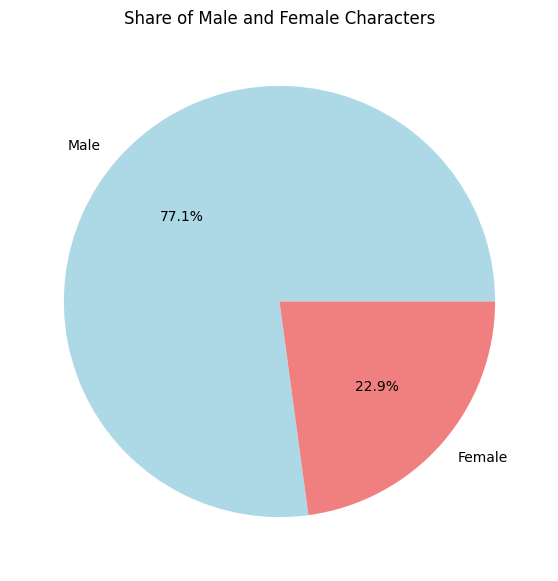

In [14]:
# Create a pie chart for male and female character counts
plt.figure(figsize=(7, 7))
plt.pie(
    [male_count, female_count],
    labels=['Male', 'Female'],
    colors=['lightblue', 'lightcoral'],
    autopct='%1.1f%%',            # displaying percentages
)

plt.title("Share of Male and Female Characters")
plt.show()  # Display the chart

In [15]:
# Create a subgraph that contains only male characters
male_nodes = [node for node in G.nodes() if G.nodes[node]['gender'] == 'M']e
male_subgraph = G.subgraph(male_nodes)

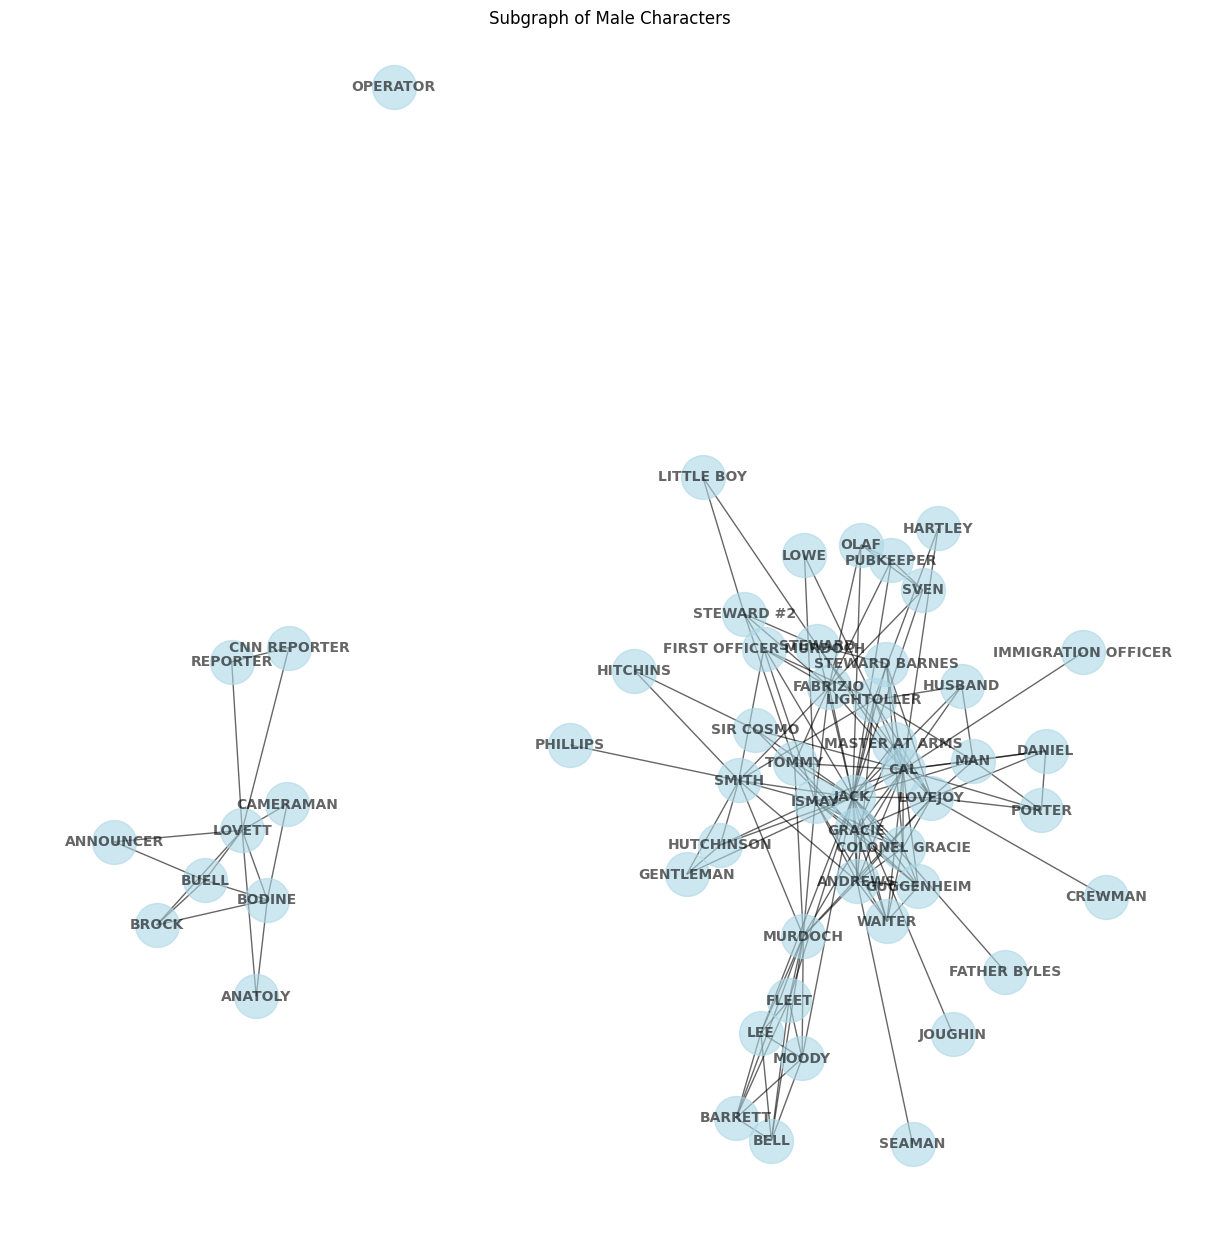

In [20]:
import matplotlib.pyplot as plt
import networkx as nx

# calculate positions for the male subgraph layout
pos = nx.spring_layout(male_subgraph, k=0.3)  # 'k' spacing between nodes

# Create a dictionary of male character labels
male_labels = {node: G.nodes[node]['label'] for node in male_subgraph.nodes()}

# Set up the figure for visualization
plt.figure(figsize=(12, 12))  # Increase figure size for better readability

# Draw the male-only subgraph with character names
nx.draw(
    male_subgraph,
    pos,
    with_labels=True,
    labels=male_labels,
    node_color='lightblue',
    node_size=1000,
    font_size=10,
    font_weight='bold',
    alpha=0.6
)

plt.title("Subgraph of Male Characters")
plt.show()

In [17]:
# calculate degree centrality for the male subgraph
male_degree_centrality = nx.degree_centrality(male_subgraph)

# find the main male characters
top_male_characters = sorted(male_degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

# Print the top male characters
print("Top Male Characters by Degree Centrality:")
for character_id, centrality in top_male_characters:
    print(f"{G.nodes[character_id]['label']} - Centrality: {centrality}")

Top Male Characters by Degree Centrality:
JACK - Centrality: 0.5471698113207547
CAL - Centrality: 0.4150943396226415
LOVEJOY - Centrality: 0.2641509433962264
ISMAY - Centrality: 0.24528301886792453
ANDREWS - Centrality: 0.22641509433962265


This section highlights that approximately 77% of the characters are male.

In the network map, it can be observed that there are three distinct clusters with no connections between them. This separation reflects the film's dual story: one storyline occurs in the past, while the other unfolds in the present day. As a result, characters from these different timelines do not interact, leading to no connections. The third group consists of an operator, could be the person filming the events, who does not engage with any characters.

Finally, the degree centrality analysis reveals that Jack, Cal, and Lovejoy are the most popular male characters in the movie.

